In [13]:
import os
from modules.stoploss import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
if path_parent.endswith("Abaqus-Macromechanics-Project"):
    os.chdir(path_parent) 
    print("Moving up to the parent directory")
    print(os.getcwd())

The current directory is: 
\\home.org.aalto.fi\zopev1\data\Desktop\Abaqus-Macromechanics-Project


In [14]:
def analyze_data_botorch(sim_data_paths, exp_data_paths, label, color):

    # Load the simulation data for all geometries
    sim_datas = [np.load(path, allow_pickle=True).item() for path in sim_data_paths]
    
    # Load the experimental data for all geometries
    exp_datas = [pd.read_csv(path) for path in exp_data_paths]

    # Initialize best combined RMSE and corresponding params and curves for each geometry
    best_combined_myloss = np.inf
    best_params = None
    best_curves = [None, None, None]
    x = []
    y_combined = []
    y_individual = [[], [], []]

    # Iterate over each parameter set in the data
    for i, (params, curves) in enumerate(sim_datas[0].items()):
        combined_myloss = 0
        for j in range(3):
            force = sim_datas[j][params]['force']
            displacement = sim_datas[j][params]['displacement']
            interpolated_force = np.interp(exp_datas[j]["displacement/mm"], displacement, force)
            myloss = lossFD(np.array(exp_datas[j]["displacement/mm"]), np.array(exp_datas[j]["force/N"]), interpolated_force, i)
            combined_myloss += myloss / 3
            y_individual[j].append(myloss)

        if combined_myloss < best_combined_myloss:
            best_combined_myloss = combined_myloss
            best_params = params
            for j in range(3):
                force = sim_datas[j][params]['force']
                displacement = sim_datas[j][params]['displacement']
                best_curves[j] = np.interp(exp_datas[j]["displacement/mm"], displacement, force)

        y_combined.append(combined_myloss)
        x.append(i)

    # Plotting
    for i in range(3):
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))
        
        # Plot the best fit curve for each geometry
        axs[0].plot(np.array(exp_datas[i]["displacement/mm"]), np.array(exp_datas[i]["force/N"]), label=f'Experimental {label[i]}', color=color[i], linewidth=2.0)
        axs[0].plot(exp_datas[i]["displacement/mm"], best_curves[i],'--', color="black", linewidth=2.0, label=f'Best Fit {label[i]}')
        axs[0].set_xlabel('Displacement (mm)')
        axs[0].set_ylabel('Force (N)')
        axs[0].legend()
        axs[0].set_title(f"Best Fit F-D Curve for Geometry {label[i]}")

        # Plot individual loss vs iteration for each geometry
        axs[1].plot(x[:120], y_individual[i][:120], label=f'Loss Geometry {label[i]}', linewidth=2.0)
        axs[1].set_xlabel('Iteration')
        axs[1].set_ylabel('Loss')
        axs[1].legend()
        axs[1].set_title(f'Loss vs Iteration for Geometry {label[i]}')

        plt.tight_layout()
        plt.show()

    # Plot combined loss vs iteration
    plt.figure(figsize=(7, 5))
    plt.plot(x, y_combined, label='Combined Loss', color='tab:red', linewidth=2.0)
    plt.xlabel('Iteration')
    plt.ylabel('Combined Loss')
    plt.legend()
    plt.title('Combined Loss vs Iteration')
    plt.show()

    return best_combined_myloss, best_params

############# BOTORCH 1 set param #################


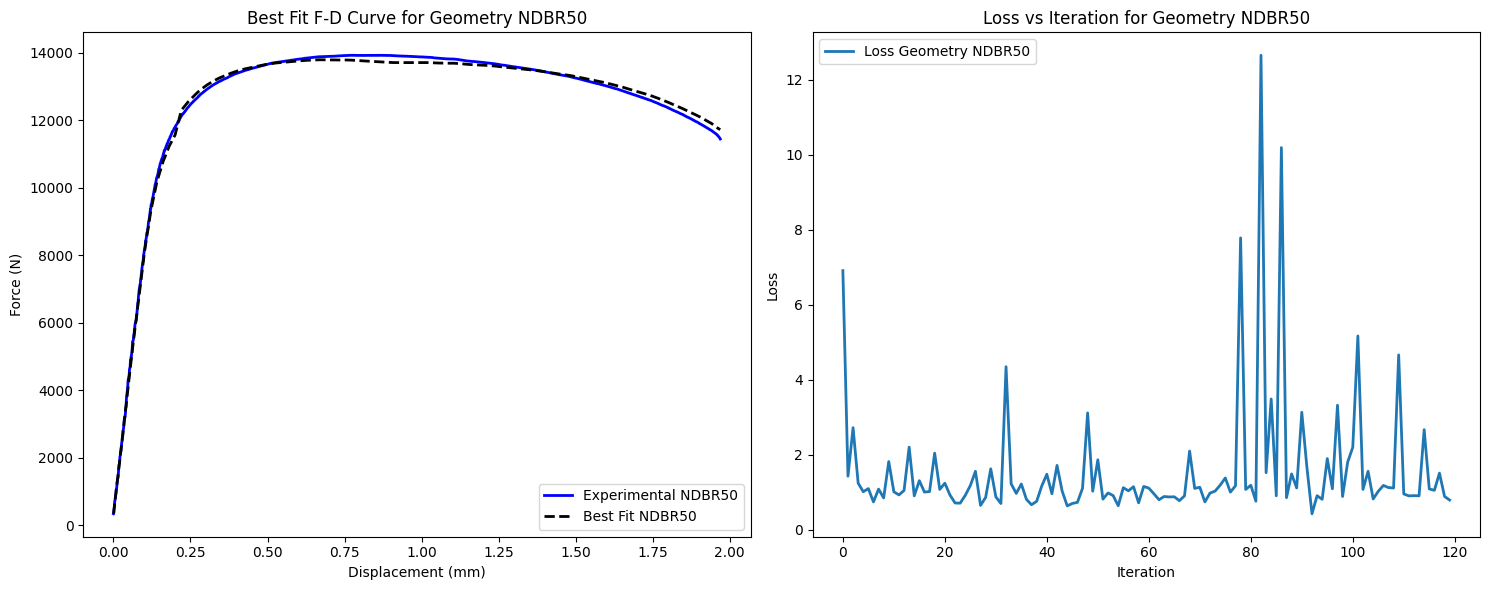

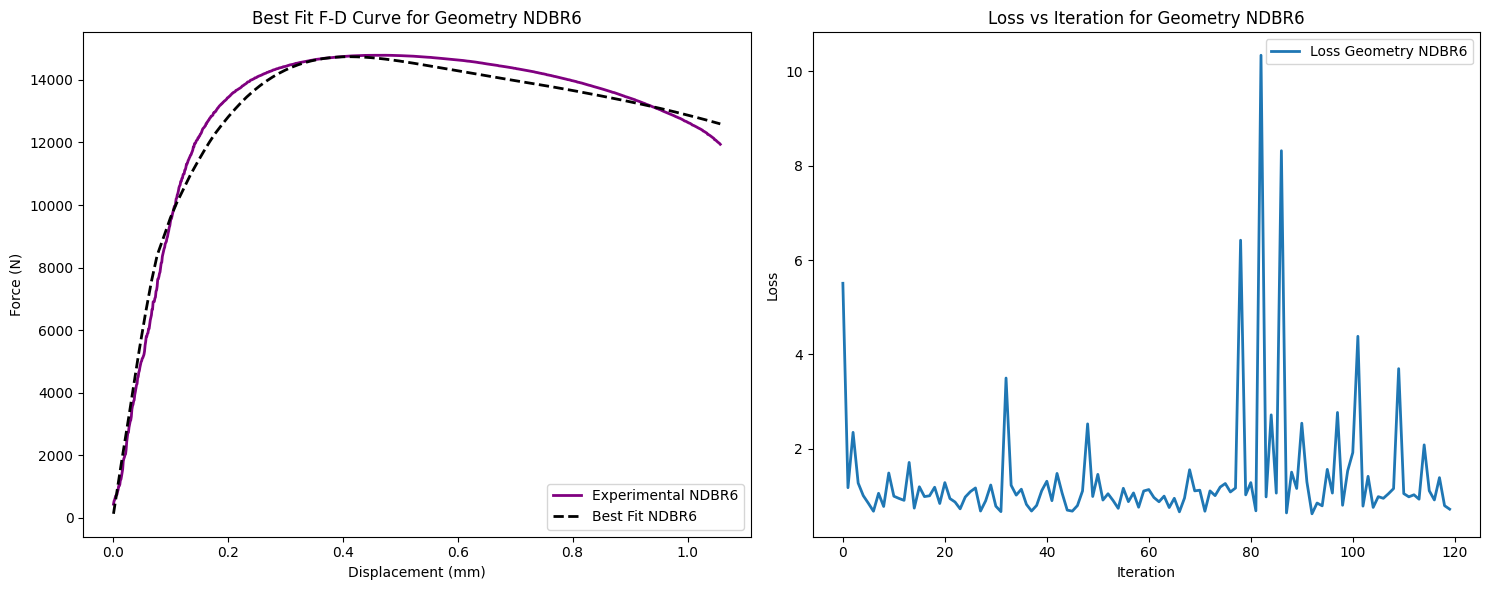

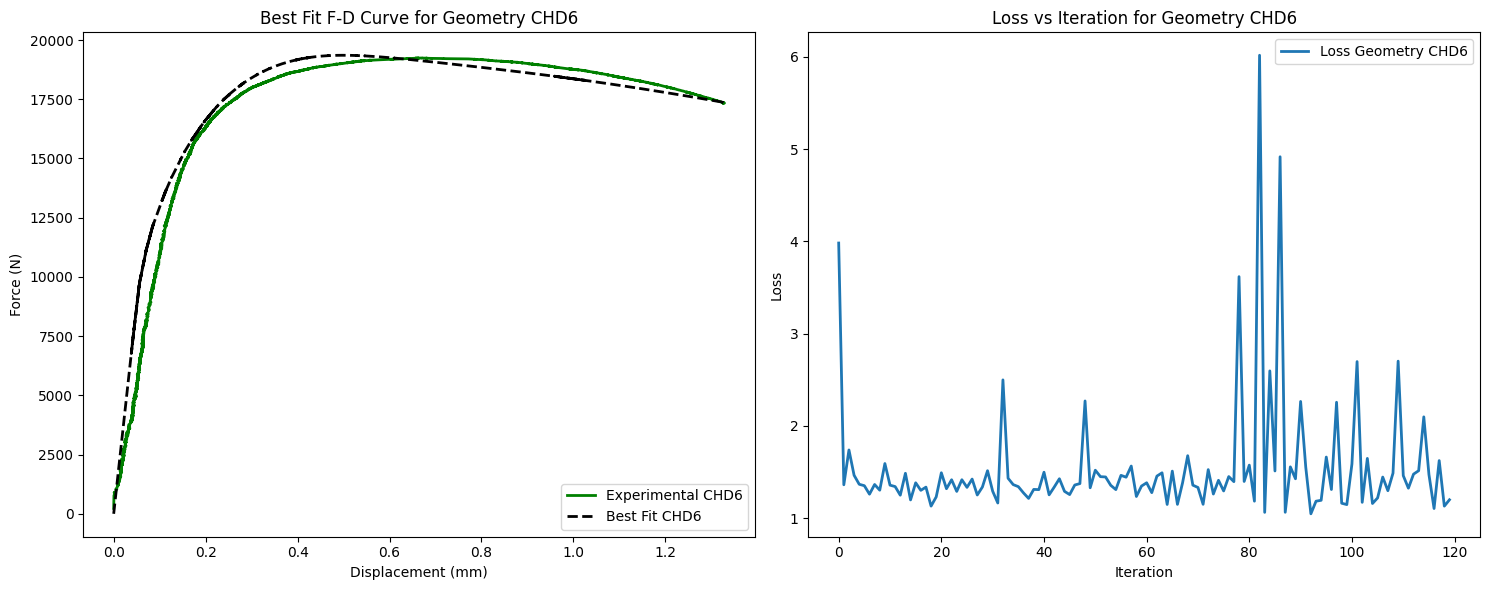

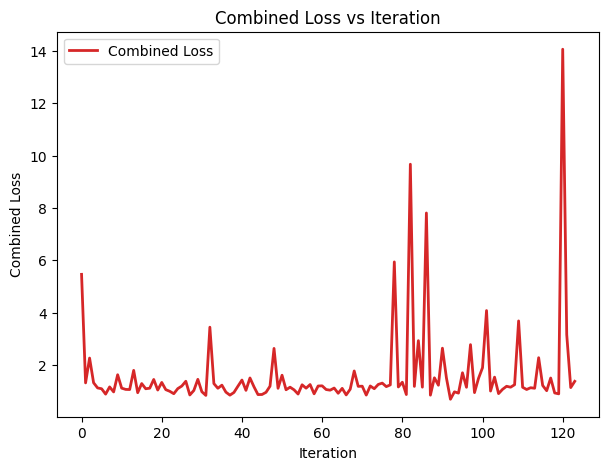

Best combined Loss -  0.695799685771474
Best fit parameters: (('c1', 0.5010716319084167), ('c2', 754.364501953125), ('c3', 0.02957204543054104), ('c4', 0.9878236055374146), ('c5', 901.2631225585938), ('c6', 944.9089965820312), ('c7', 176.55902099609375))


In [15]:
sim_data_paths = ['MOO_Results_Botorch/NDBR50/FD_Curves_smooth.npy', 'MOO_Results_Botorch/NDBR6/FD_Curves_smooth.npy', 'MOO_Results_Botorch/CHD6/FD_Curves_smooth.npy']
exp_data_paths = ['MOO_targets/DP1000_400C_SwiftVoce_curve1/NDBR50/FD_Curve.csv', 'MOO_targets/DP1000_400C_SwiftVoce_curve1/NDBR6/FD_Curve.csv', 'MOO_targets/DP1000_400C_SwiftVoce_curve1/CHD6/FD_Curve.csv']
label = ["NDBR50","NDBR6","CHD6"]
color = ["blue","purple","green"]
print("############# BOTORCH 1 set param #################")
best_combined_rmse, best_params = analyze_data_botorch(sim_data_paths, exp_data_paths,label, color)
print("Best combined Loss - ", best_combined_rmse)
print('Best fit parameters:', best_params)

In [16]:
sim_data_paths = ['weighted/NDBR50/FD_Curves_smooth.npy', 'weighted/NDBR6/FD_Curves_smooth.npy', 'weighted/CHD6/FD_Curves_smooth.npy']
exp_data_paths = ['MOO_targets/DP1000_400C_SwiftVoce_curve1/NDBR50/FD_Curve.csv', 'MOO_targets/DP1000_400C_SwiftVoce_curve1/NDBR6/FD_Curve.csv', 'MOO_targets/DP1000_400C_SwiftVoce_curve1/CHD6/FD_Curve.csv']
label = ["NDBR50","NDBR6","CHD6"]
color = ["blue","purple","green"]
print("############# WEIGHTED 1 set param #################")
best_combined_rmse, best_params = analyze_data_botorch(sim_data_paths, exp_data_paths, label, color)
print("Best combined Loss - ", best_combined_rmse)
print('Best fit parameters:', best_params)

############# WEIGHTED 1 set param #################


FileNotFoundError: [Errno 2] No such file or directory: 'weighted/NDBR50/FD_Curves_smooth.npy'